In [1]:

import matplotlib.pyplot as plt
from pylab import rcParams

import numpy as np
import pandas as pd
import pickle

from scipy.stats import entropy


### Find out the testset song names

In [47]:
import pickle, json

In [48]:
songnames = json.load(open('../../../../Lyrics-Conditioned-Neural-Melody-Generation/lmd-full_MIDI_dataset/listSongJSON.json', 'r'))

In [3]:
filenames = pickle.load(open('../../data/skipgram/dataset_filenames/test_filename_list.pkl', 'rb'))

In [5]:
len(filenames)

1051

In [16]:
filenames[0]

'c29bb5147389325d882bbbddd4846f70.npy'

In [44]:
filenames.index('e40ab3c5920f1e1a9bc2e76359ba27ad.npy')

773

In [50]:
test_songnames = [songnames[f.rstrip('.npy')] for f in filenames]

In [54]:
for i, s in enumerate(test_songnames):
    print(i, s)

0 P/Peoplege.MID
1 P/Peoplege.MID
2 C/Cantwait L.mid
3 C/Cantwait L.mid
4 F/For Once in My Life Pm L.mid
5 F/For Once in My Life Pm L.mid
6 S/Sunshine L.mid
7 S/Sunshine L.mid
8 003 Commercial Midis-TEAMTND [02.15.02]/Stay.mid
9 003 Commercial Midis-TEAMTND [02.15.02]/Stay.mid
10 D/DION.To love you more K.mid
11 D/DION.To love you more K.mid
12 Sinatra Frank/Frank Sinatra - Something Stupid.mid
13 Sinatra Frank/Frank Sinatra - Something Stupid.mid
14 S/Shakira Objection.mid
15 B/Bohemiancurry L.mid
16 T/THE BEACH BOYS.kokomo  K.mid
17 T/THE BEACH BOYS.kokomo  K.mid
18 P/pink-try.mid
19 P/pink-try.mid
20 Eagles/Eagles - Bells Will Be Ringing L.mid
21 Eagles/Eagles - Bells Will Be Ringing L.mid
22 m/makemelosecontrol.mid
23 m/makemelosecontrol.mid
24 Natalie Imbruglia/Natalie Imbruglia - Smoke L.mid
25 Natalie Imbruglia/Natalie Imbruglia - Smoke L.mid
26 H/Heyaheya.MID
27 Commercial Midi Pack 002/Little Rock.mid
28 Commercial Midi Pack 002/Little Rock.mid
29 D/Dontwalk.MID
30 D/Dontwalk.

495 Y/Youngand L.mid
496 D/Dontstan L.mid
497 D/Dontstan L.mid
498 J/JAMIROQUAY.Love foolosophy K.mid
499 J/JAMIROQUAY.Love foolosophy K.mid
500 Yes/Yes - Heart of the Sunrise L.mid
501 Yes/Yes - Heart of the Sunrise L.mid
502 R/Reamonn++supergirl.mid
503 R/Reamonn++supergirl.mid
504 003 Commercial Midis-TEAMTND [02.15.02]/The Winner Takes It All-1.mid
505 L/Layla 2 L.mid
506 L/Layla 2 L.mid
507 U/Up&down.mid
508 U/Up&down.mid
509 017 Joe Cocker - Greates Hits/Youcanle.mid
510 017 Joe Cocker - Greates Hits/Youcanle.mid
511 poprock/hurting_inside-dave_clark_5-kar_bleezdo.mid
512 poprock/hurting_inside-dave_clark_5-kar_bleezdo.mid
513 E/Eyeinthe.mid
514 E/Eyeinthe.mid
515 O/one_direction-i_wish.mid
516 O/one_direction-i_wish.mid
517 S/Saturday.mid
518 S/Saturday.mid
519 H/Haveyouseenher L.mid
520 H/Haveyouseenher L.mid
521 034 Discofox 2/Followme.MID
522 034 Discofox 2/Followme.MID
523 Frankiboy/Summerwi.mid
524 Frankiboy/Summerwi.mid
525 H/Heaven Must Be Missing L.mid
526 H/Heaven Must 

## Visualizations

In [102]:

# ground truth song attr and songs
test_dat_attr = pickle.load(open('../../results/test/y_test_dat_attr.pkl', 'rb'))
test_dat_p_attr, test_dat_d_attr, test_dat_r_attr = test_dat_attr
test_dat_songs = np.load('../../results/test/test_dat_songs.npy')

# songs generated using C-Hybrid-GAN
test_c_hybrid_gan_attr = pickle.load(open('../../results/c_hybrid_gan/generated/c_hybrid_gan_y_test_gen_attr.pkl', 'rb'))
test_c_hybrid_gan_p_attr, test_c_hybrid_gan_d_attr, test_c_hybrid_gan_r_attr = test_c_hybrid_gan_attr
test_c_hybrid_gan_songs = np.load('../../results/c_hybrid_gan/generated/c_hybrid_gan_test_gen_songs.npy')

# songs generated using C-Hybrid-MLE
test_c_hybrid_mle_attr = pickle.load(open('../../results/c_hybrid_gan/generated/c_hybrid_mle_y_test_gen_attr.pkl', 'rb'))
test_c_hybrid_mle_p_attr, test_c_hybrid_mle_d_attr, test_c_hybrid_mle_r_attr = test_c_hybrid_mle_attr
test_c_hybrid_mle_songs = np.load('../../results/c_hybrid_gan/generated/c_hybrid_mle_test_gen_songs.npy') 

# songs generated using C-Hybrid-GAN only conditioned on lyrics
test_c_hybrid_only_lyrics, _, _ = pickle.load(open('../../results/baseline/c_hybrid_gan_y_test_gen_attr.pkl', 'rb'))


In [103]:
test_c_hybrid_only_lyrics[0]

array([67., 69., 67., 69., 71., 69., 66., 67., 66., 71., 69., 69., 69.,
       71., 67., 69., 71., 69., 71., 74.])

In [104]:
SEED_LENGTH = 8

Limit the statistics to last 12 notes, so that they correspond to the length of generated music

In [105]:
test_dat_p_attr, test_dat_d_attr, test_dat_r_attr = test_dat_p_attr[:, SEED_LENGTH:], test_dat_d_attr[:, SEED_LENGTH:], test_dat_r_attr[:, SEED_LENGTH:]
test_c_hybrid_only_lyrics = test_c_hybrid_only_lyrics[:, SEED_LENGTH:]

### Dataset Distribution of Music Attributes (Fig. 5)

In [106]:

SMALL_SIZE  = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24


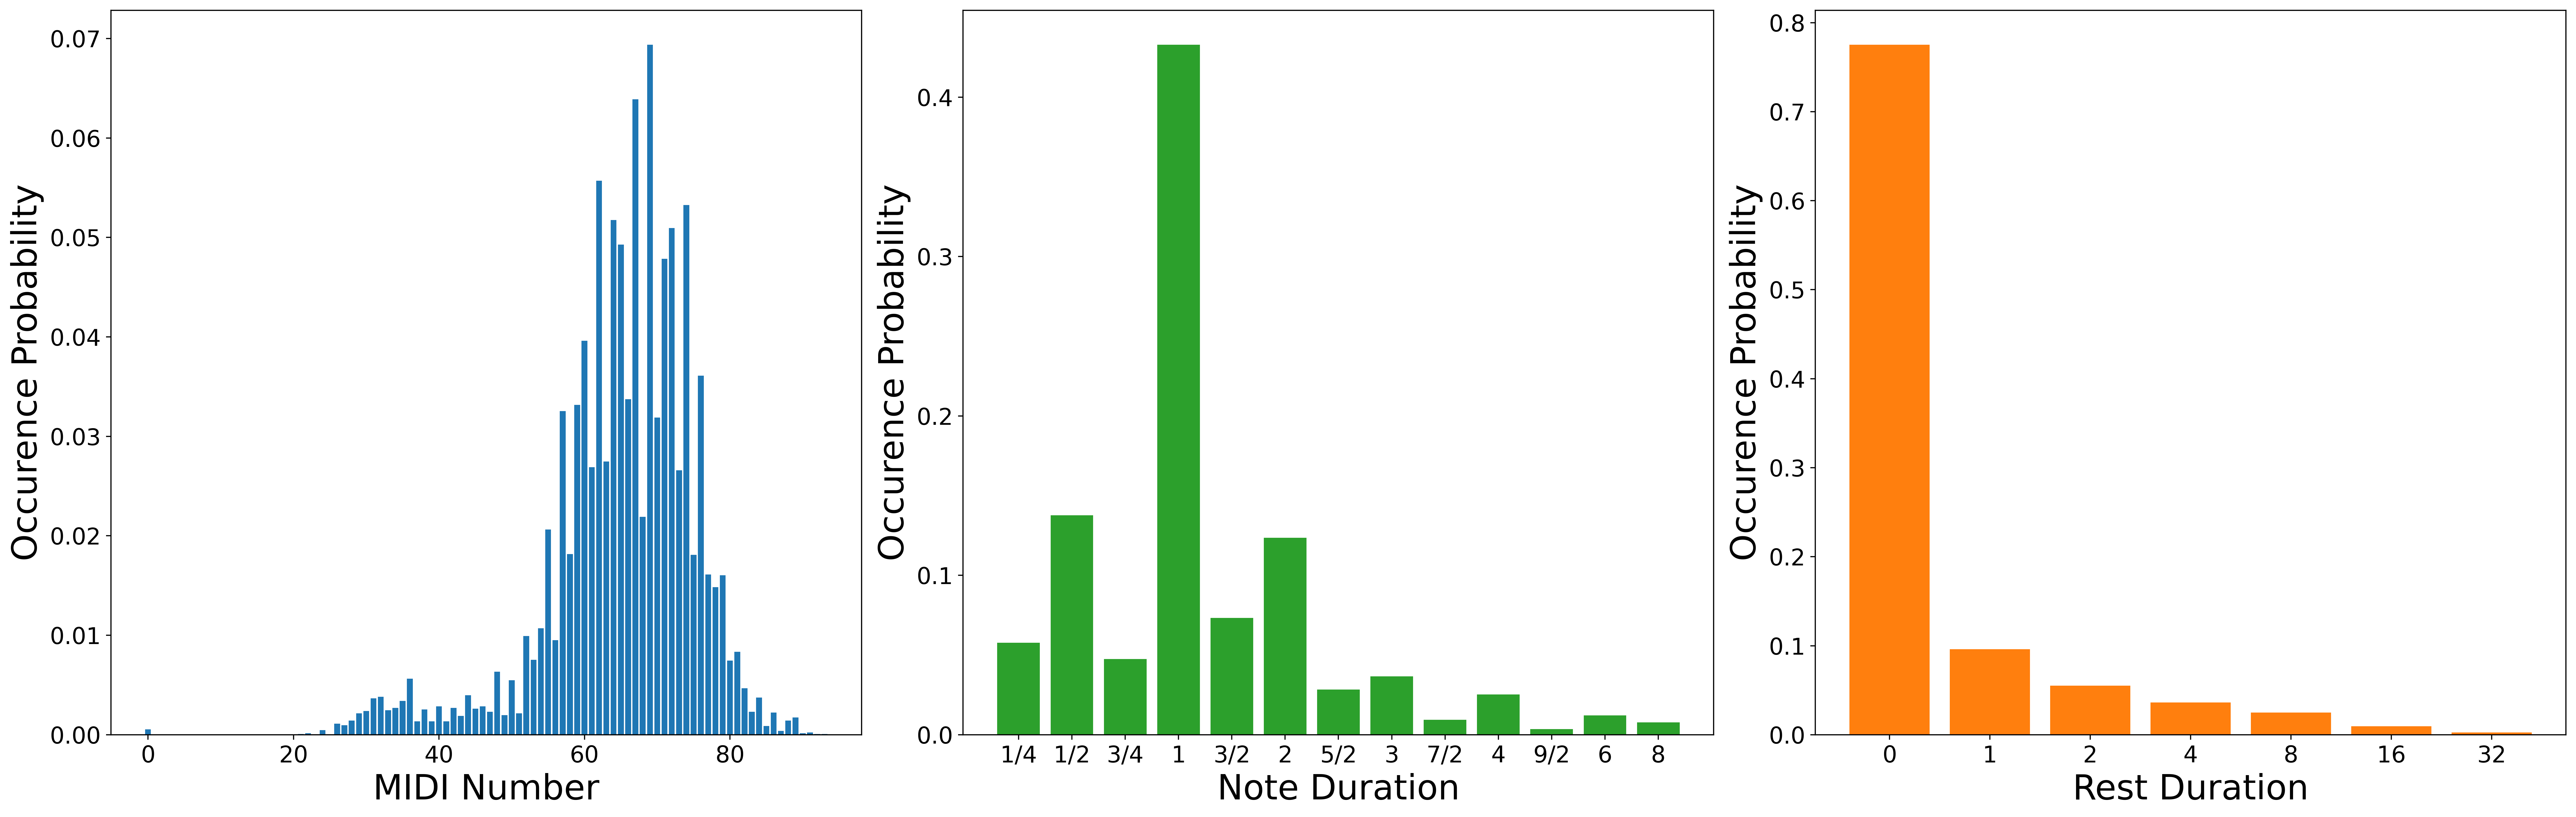

In [109]:

plt.figure(figsize=(25, 8))

plt.rc('axes',  labelsize=BIGGER_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)   # fontsize of the tick labels

plt.subplot(131)
p, num_p = np.unique(np.ravel(test_dat_p_attr), return_counts=True)
plt.bar(p, num_p/sum(num_p))
plt.xlabel('MIDI Number')
plt.ylabel('Occurence Probability')

plt.subplot(132)
d, num_d = np.unique(np.ravel(test_dat_d_attr), return_counts=True)
filtered_d, filtered_num_d = [], []
for count, length in zip(num_d, ['0', '1/4', '1/2', '3/4', '1', '3/2', '2', '5/2', '3', '7/2', '4', '9/2', '6', '13/2', '8', '17/2', '16', '33/2', '32']):
    if count > 20:
        filtered_d.append(length)
        filtered_num_d.append(count)
plt.bar(filtered_d, np.array(filtered_num_d)/sum(num_d), color='tab:green')
plt.xlabel('Note Duration')
plt.ylabel('Occurence Probability')

plt.subplot(133)
r, num_r = np.unique(np.ravel(test_dat_r_attr), return_counts=True)
plt.bar(['0', '1', '2', '4', '8', '16', '32'], num_r/sum(num_r), color='tab:orange')
plt.xlabel('Rest Duration')
plt.ylabel('Occurence Probability')

plt.tight_layout()
plt.savefig('./figures/attr.png', dpi=400)


### Distribution of Transitions (Fig. 9)

In [110]:
def transition_util(p_attr, steps=8):
    transition = p_attr[:, 1:] - p_attr[:, :-1]
    trans, num_trans = np.unique(np.ravel(transition), return_counts=True)
    center = np.argmax(num_trans)
    labels = [str(int(i)) for i in trans[(center-steps):(center+steps)] ]
    return labels, num_trans[(center-steps):(center+steps)] 

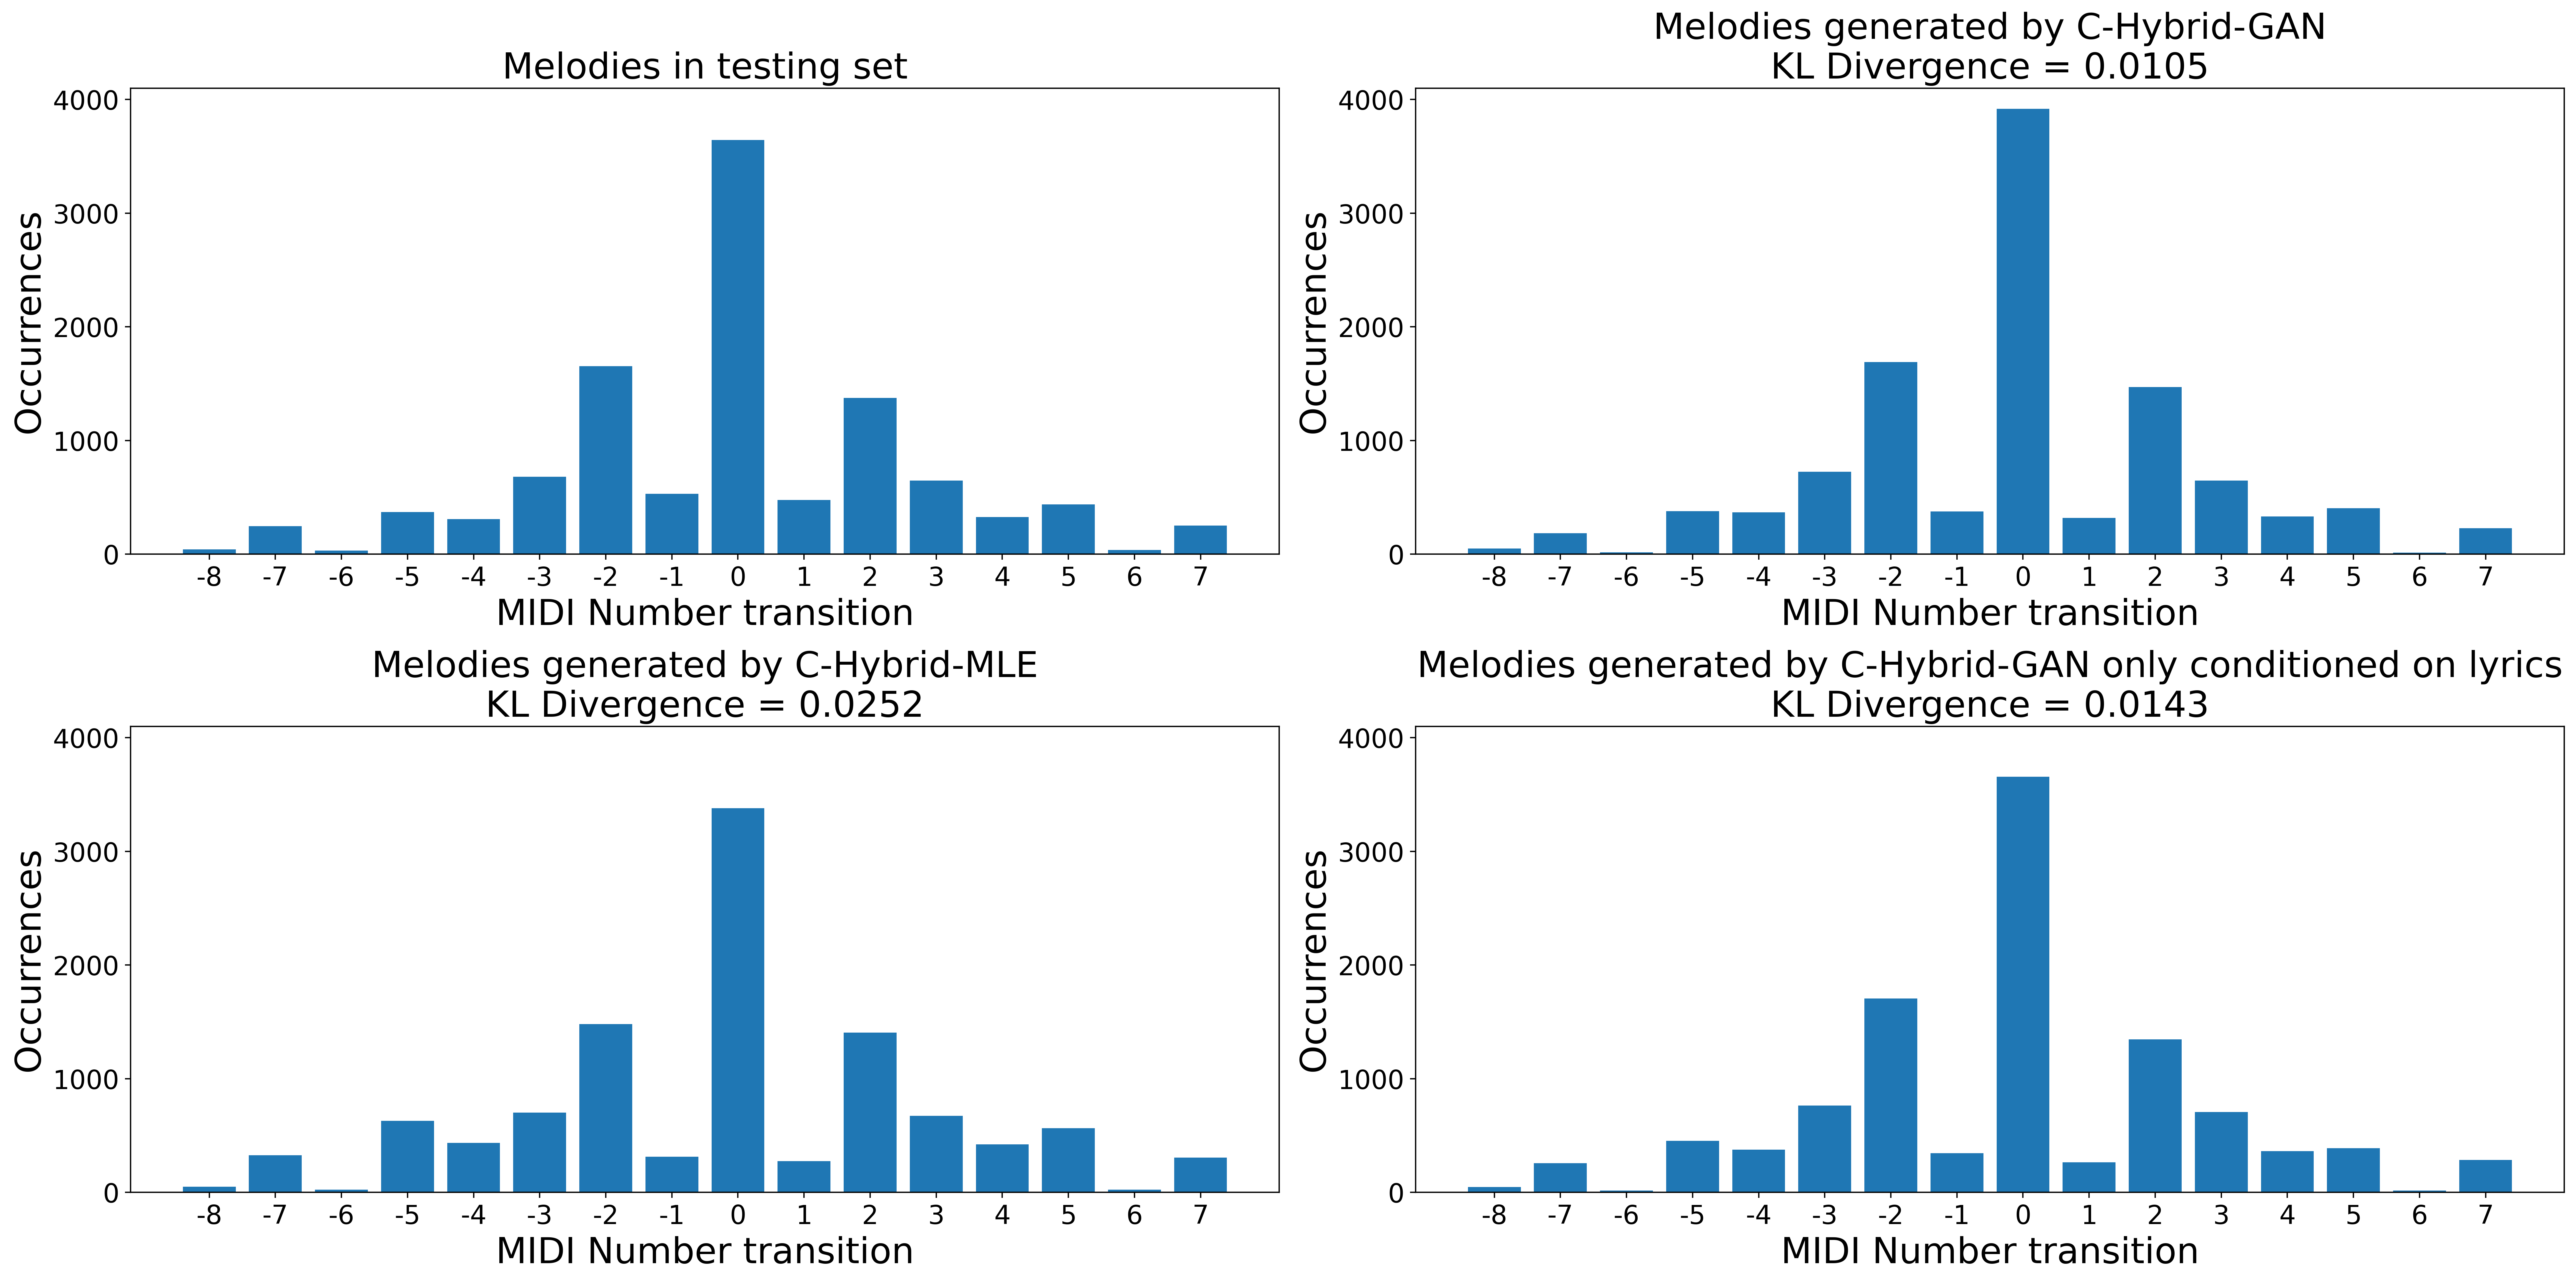

In [119]:

plt.figure(figsize=(22, 11))
rcParams['figure.dpi'] = 400

plt.rc('axes',  titlesize=22, labelsize=22)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)   # fontsize of the tick labels
plt.rc('ytick', labelsize=16)   # fontsize of the tick labels

x1, y1 = transition_util(test_dat_p_attr)
    
plt.subplot(221)
plt.bar(x1, y1)
plt.title('Melodies in testing set')
plt.ylabel('Occurrences')
plt.xlabel('MIDI Number transition')
plt.ylim(0, 4100)

x2, y2 = transition_util(test_c_hybrid_gan_p_attr)

plt.subplot(222)
plt.bar(x2, y2)
plt.title(f'Melodies generated by C-Hybrid-GAN\nKL Divergence = {round(entropy(y1, y2), 4)}')
plt.ylabel('Occurrences')
plt.xlabel('MIDI Number transition')
plt.ylim(0, 4100)

x3, y3 = transition_util(test_c_hybrid_mle_p_attr)

plt.subplot(223)
plt.bar(x3, y3)
plt.title(f'Melodies generated by C-Hybrid-MLE\nKL Divergence = {round(entropy(y1, y3), 4)}')
plt.ylabel('Occurrences')
plt.xlabel('MIDI Number transition')
plt.ylim(0, 4100)

x4, y4 = transition_util(test_c_hybrid_only_lyrics)

plt.subplot(224)
plt.bar(x4, y4)
plt.title(f'Melodies generated by C-Hybrid-GAN only conditioned on lyrics\nKL Divergence = {round(entropy(y1, y4), 4)}')
plt.ylabel('Occurrences')
plt.xlabel('MIDI Number transition')
plt.ylim(0, 4100)

plt.tight_layout()
plt.savefig('./figures/transitions_with_kl.png')


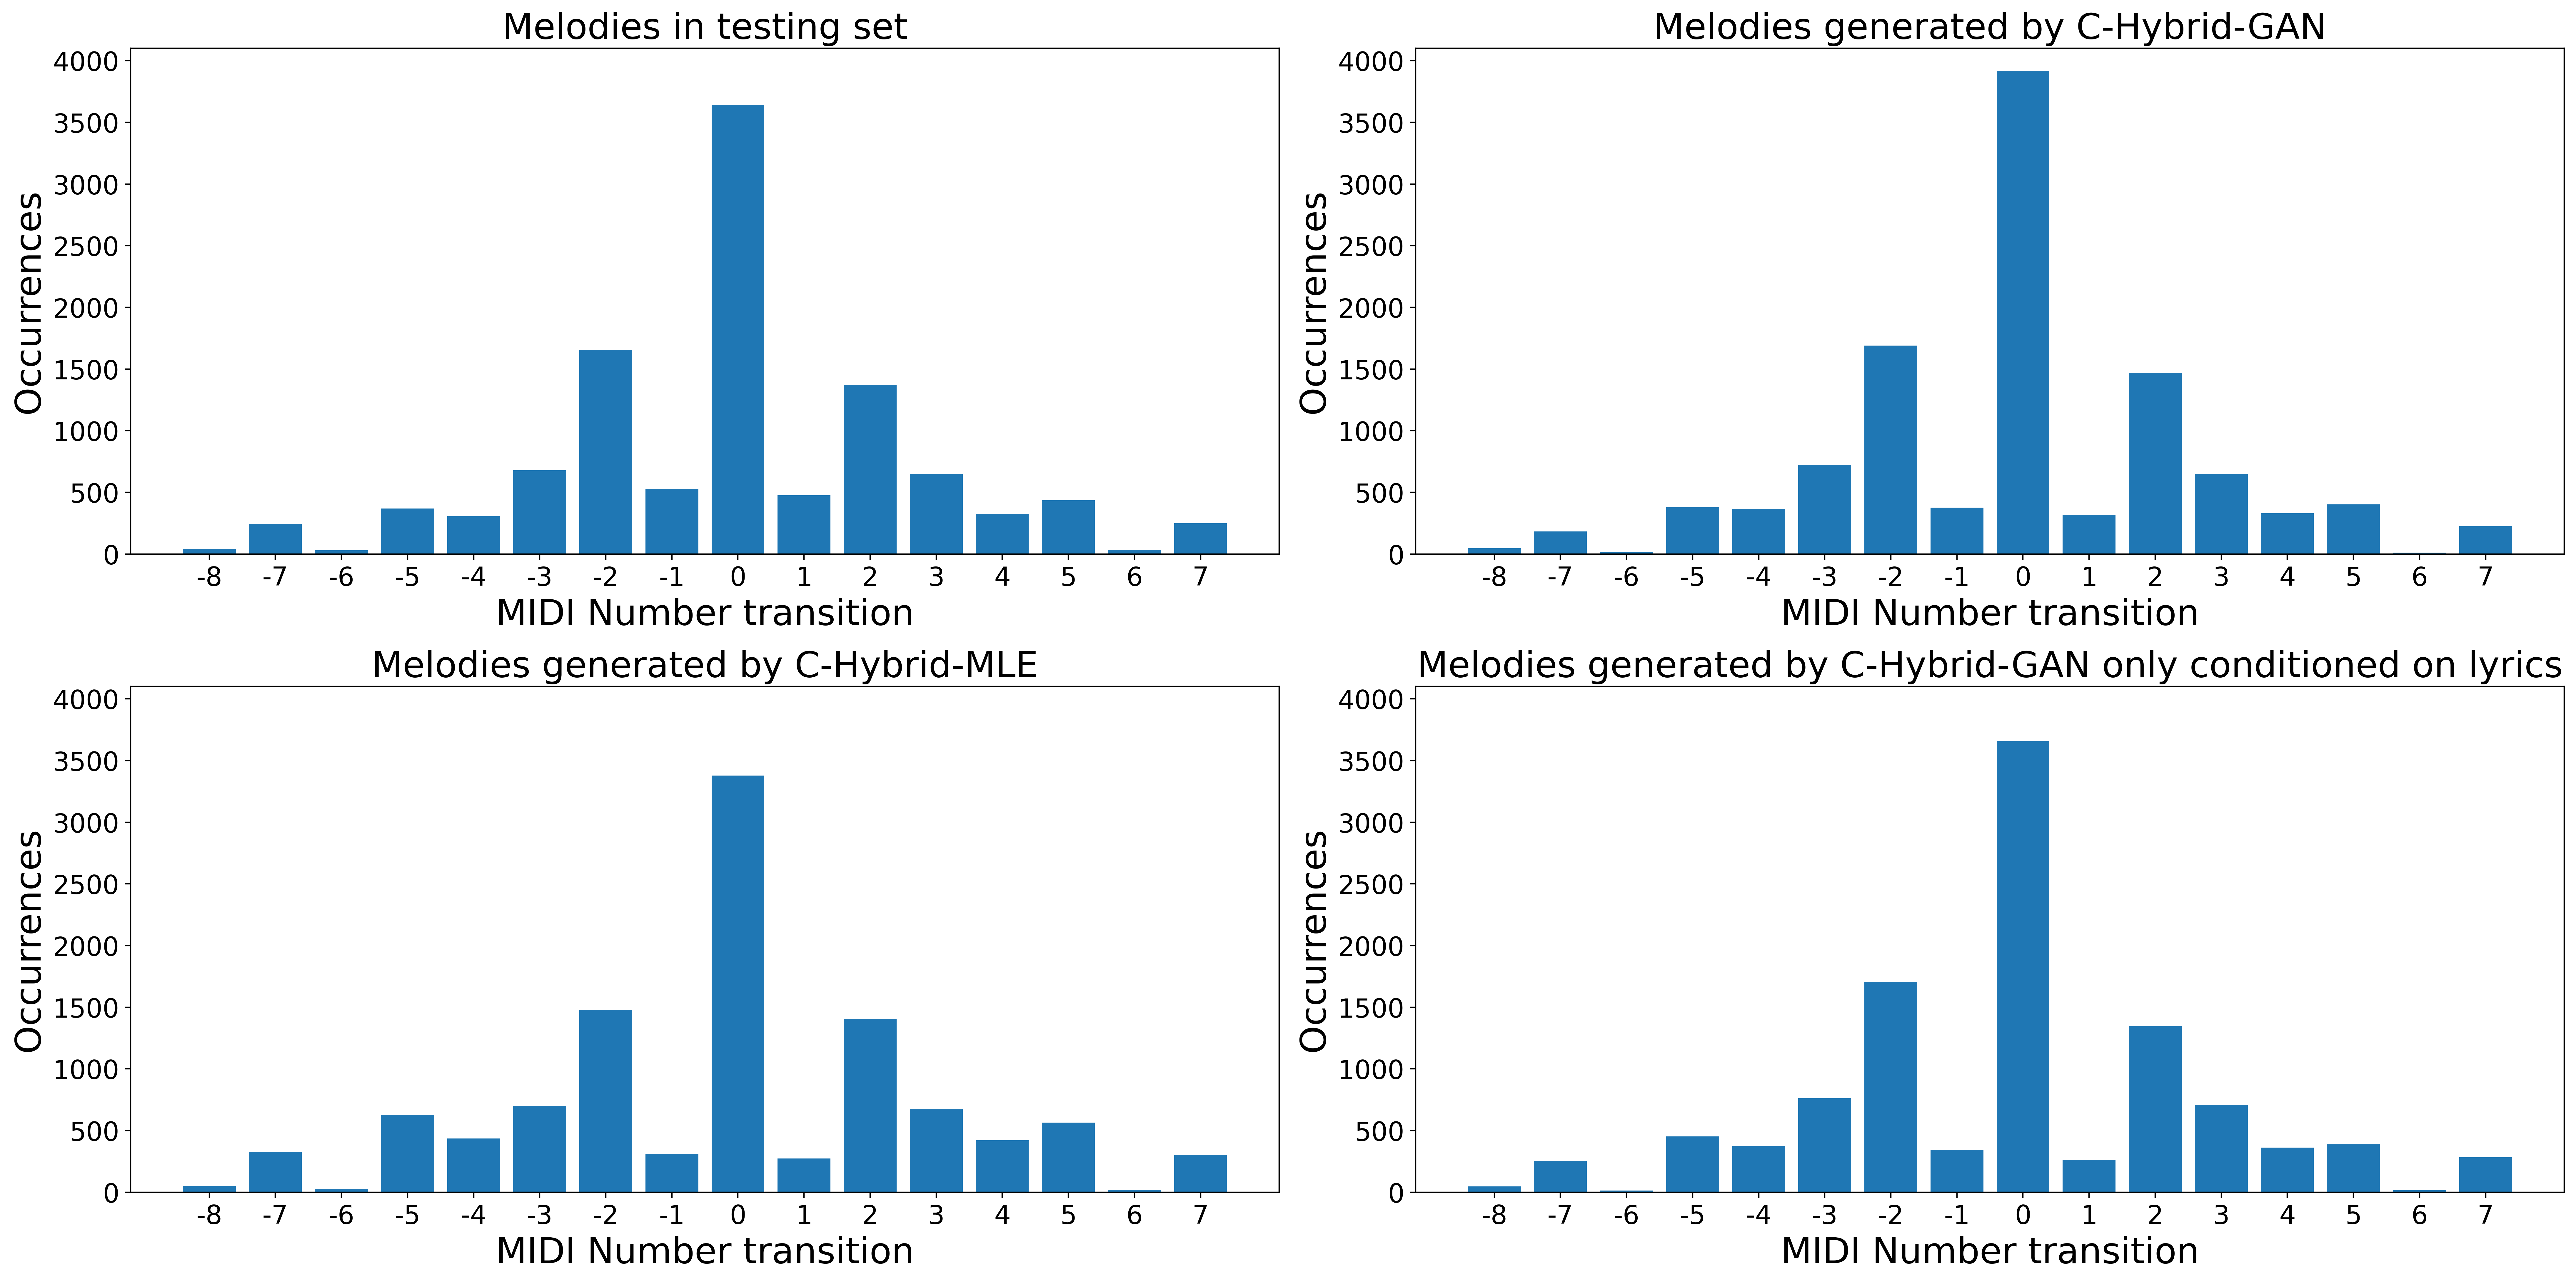

In [117]:

plt.figure(figsize=(22, 11))
rcParams['figure.dpi'] = 400

plt.rc('axes',  titlesize=22, labelsize=22)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)   # fontsize of the tick labels
plt.rc('ytick', labelsize=16)   # fontsize of the tick labels

x1, y1 = transition_util(test_dat_p_attr)
    
plt.subplot(221)
plt.bar(x1, y1)
plt.title('Melodies in testing set')
plt.ylabel('Occurrences')
plt.xlabel('MIDI Number transition')
plt.ylim(0, 4100)

x2, y2 = transition_util(test_c_hybrid_gan_p_attr)

plt.subplot(222)
plt.bar(x2, y2)
plt.title(f'Melodies generated by C-Hybrid-GAN')
plt.ylabel('Occurrences')
plt.xlabel('MIDI Number transition')
plt.ylim(0, 4100)

x3, y3 = transition_util(test_c_hybrid_mle_p_attr)

plt.subplot(223)
plt.bar(x3, y3)
plt.title(f'Melodies generated by C-Hybrid-MLE')
plt.ylabel('Occurrences')
plt.xlabel('MIDI Number transition')
plt.ylim(0, 4100)

x4, y4 = transition_util(test_c_hybrid_only_lyrics)

plt.subplot(224)
plt.bar(x4, y4)
plt.title(f'Melodies generated by C-Hybrid-GAN only conditioned on lyrics')
plt.ylabel('Occurrences')
plt.xlabel('MIDI Number transition')
plt.ylim(0, 4100)

plt.tight_layout()
plt.savefig('./figures/transitions_without_kl.png')


### Figure 11 & 12 Boxplots of distributions of drs, drn, and drns

In [120]:

def randomize_order(dat_attr, gen_attr, num_notes, 
                    is_randomize_song_order=False, 
                    is_randomize_note_order=False):
    distances = []
    for i in range(10000):
        if is_randomize_song_order: 
            np.random.shuffle(dat_attr)

        if is_randomize_note_order:
            dat_attr = np.transpose(dat_attr)
            np.random.shuffle(dat_attr)
            dat_attr = np.transpose(dat_attr)

        dist = np.sum(np.abs(np.subtract(dat_attr, gen_attr)))
        distances.append(dist)

    return [dist/num_notes for dist in distances]


In [121]:
def randomize_util(dat_attr, gen_attr):
    num_notes = dat_attr.shape[0] * dat_attr.shape[1]
    dist_dat_gen = np.sum(np.abs(np.subtract(dat_attr, gen_attr)))

    dist_avg_random_songs = randomize_order(dat_attr, 
                                          gen_attr, 
                                          num_notes, 
                                          is_randomize_song_order=True, 
                                          is_randomize_note_order=False)
    dist_avg_random_songs.insert(0, dist_dat_gen / num_notes)

    dist_avg_random_notes_order = randomize_order(dat_attr, 
                                                gen_attr,
                                                num_notes, 
                                                is_randomize_song_order=False,
                                                is_randomize_note_order=True)
    dist_avg_random_notes_order.insert(0, dist_dat_gen / num_notes)

    dist_avg_random_songs_and_notes = randomize_order(dat_attr, 
                                                    gen_attr,
                                                    num_notes, 
                                                    is_randomize_song_order=True,
                                                    is_randomize_note_order=True)

    dist_avg_random_songs_and_notes.insert(0, dist_dat_gen / num_notes)

    return (dist_avg_random_songs, 
          dist_avg_random_notes_order, 
          dist_avg_random_songs_and_notes)


In [122]:
x2, y2, z2 = randomize_util(test_dat_d_attr, test_c_hybrid_gan_d_attr)

In [123]:
x2[0], y2[0], z2[0], np.mean(x2[1:]), np.mean(y2[1:]), np.mean(z2[1:])

(0.9216269841269841,
 0.9216269841269841,
 0.9216269841269841,
 1.067845873015873,
 1.0644842142857145,
 1.067658)

In [124]:
x3, y3, z3 = randomize_util(test_dat_r_attr, test_c_hybrid_gan_r_attr)

In [125]:
x3[0], y3[0], z3[0], np.mean(x3[1:]), np.mean(y3[1:]), np.mean(z3[1:])

(1.2484920634920635,
 1.2484920634920635,
 1.2484920634920635,
 1.355457857142857,
 1.3557129523809524,
 1.3557587301587302)

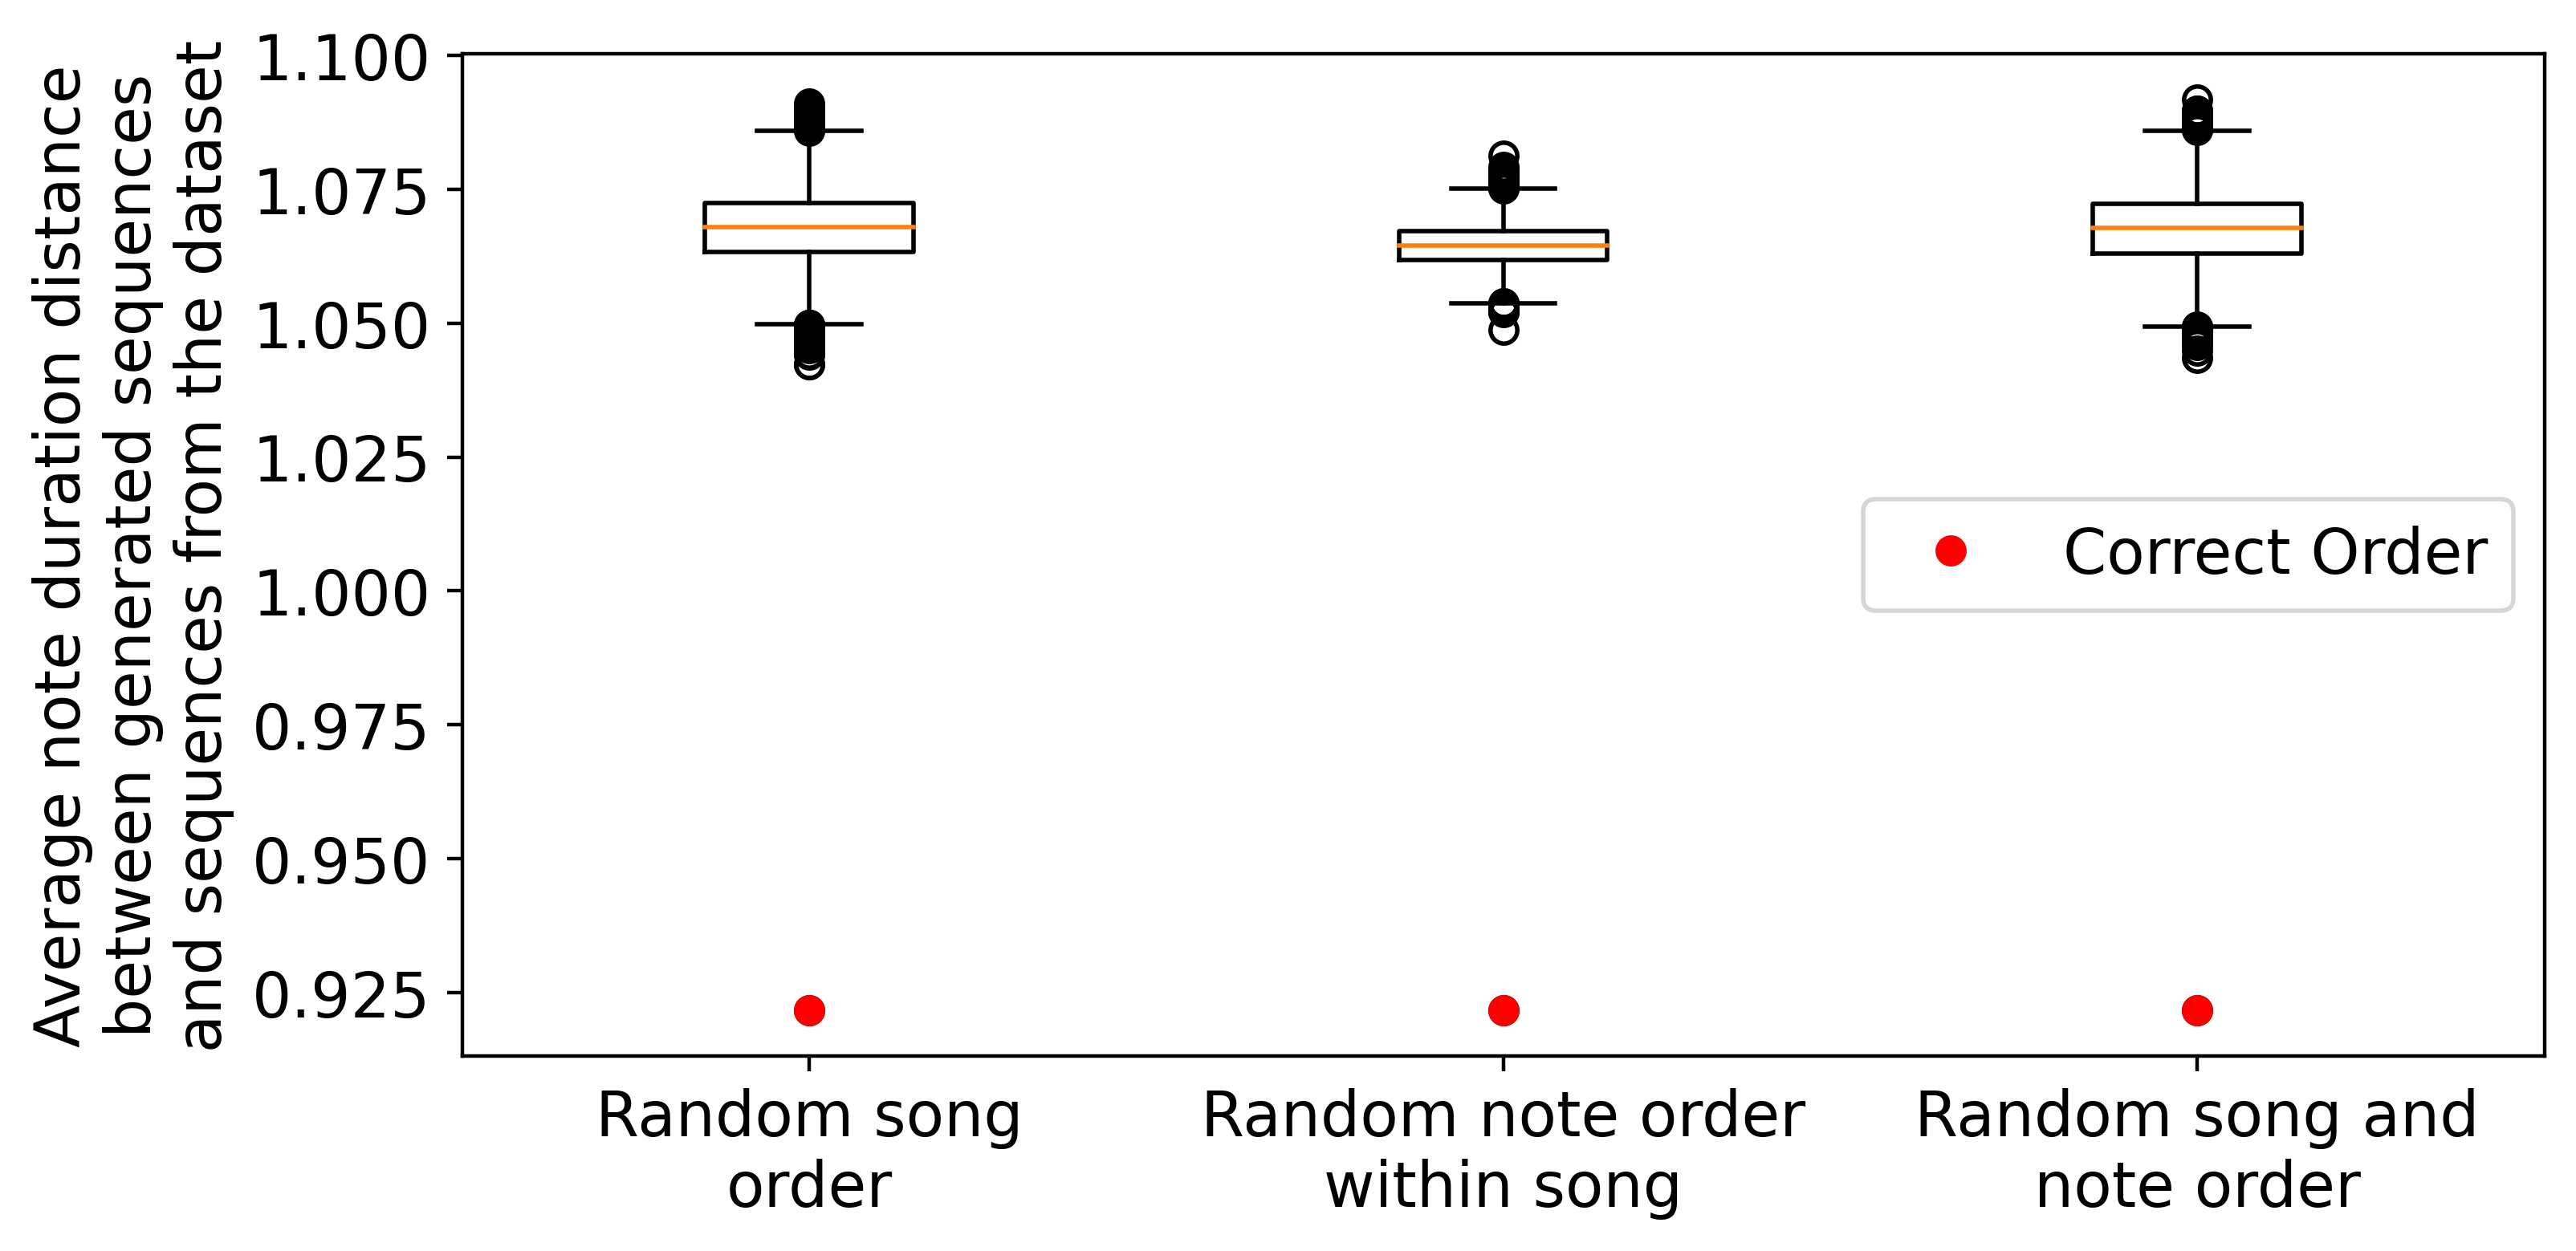

In [126]:

fig = plt.figure(num=None, figsize=(8, 4), dpi=400, facecolor='w', edgecolor='k')

plt.rc('axes',  titlesize=14, labelsize=14)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)   # fontsize of the tick labels
plt.rc('ytick', labelsize=14)   # fontsize of the tick labels
plt.rc('legend', fontsize =14)   # legend fontsize

plt.boxplot([x2, y2, z2])
correct = plt.plot([None, x2[0], y2[0], z2[0]], 'o', color='red', label='Correct Order')
plt.legend(handles=correct, loc=1)
my_xticks = ['Random song\norder',
             'Random note order\nwithin song',
             'Random song and\nnote order']
plt.xticks(np.array([1, 2, 3]), my_xticks)
plt.ylabel('Average note duration distance\nbetween generated sequences\n and sequences from the dataset')

plt.legend()
plt.tight_layout()
plt.savefig('./figures/duration_distance_boxplot.png')


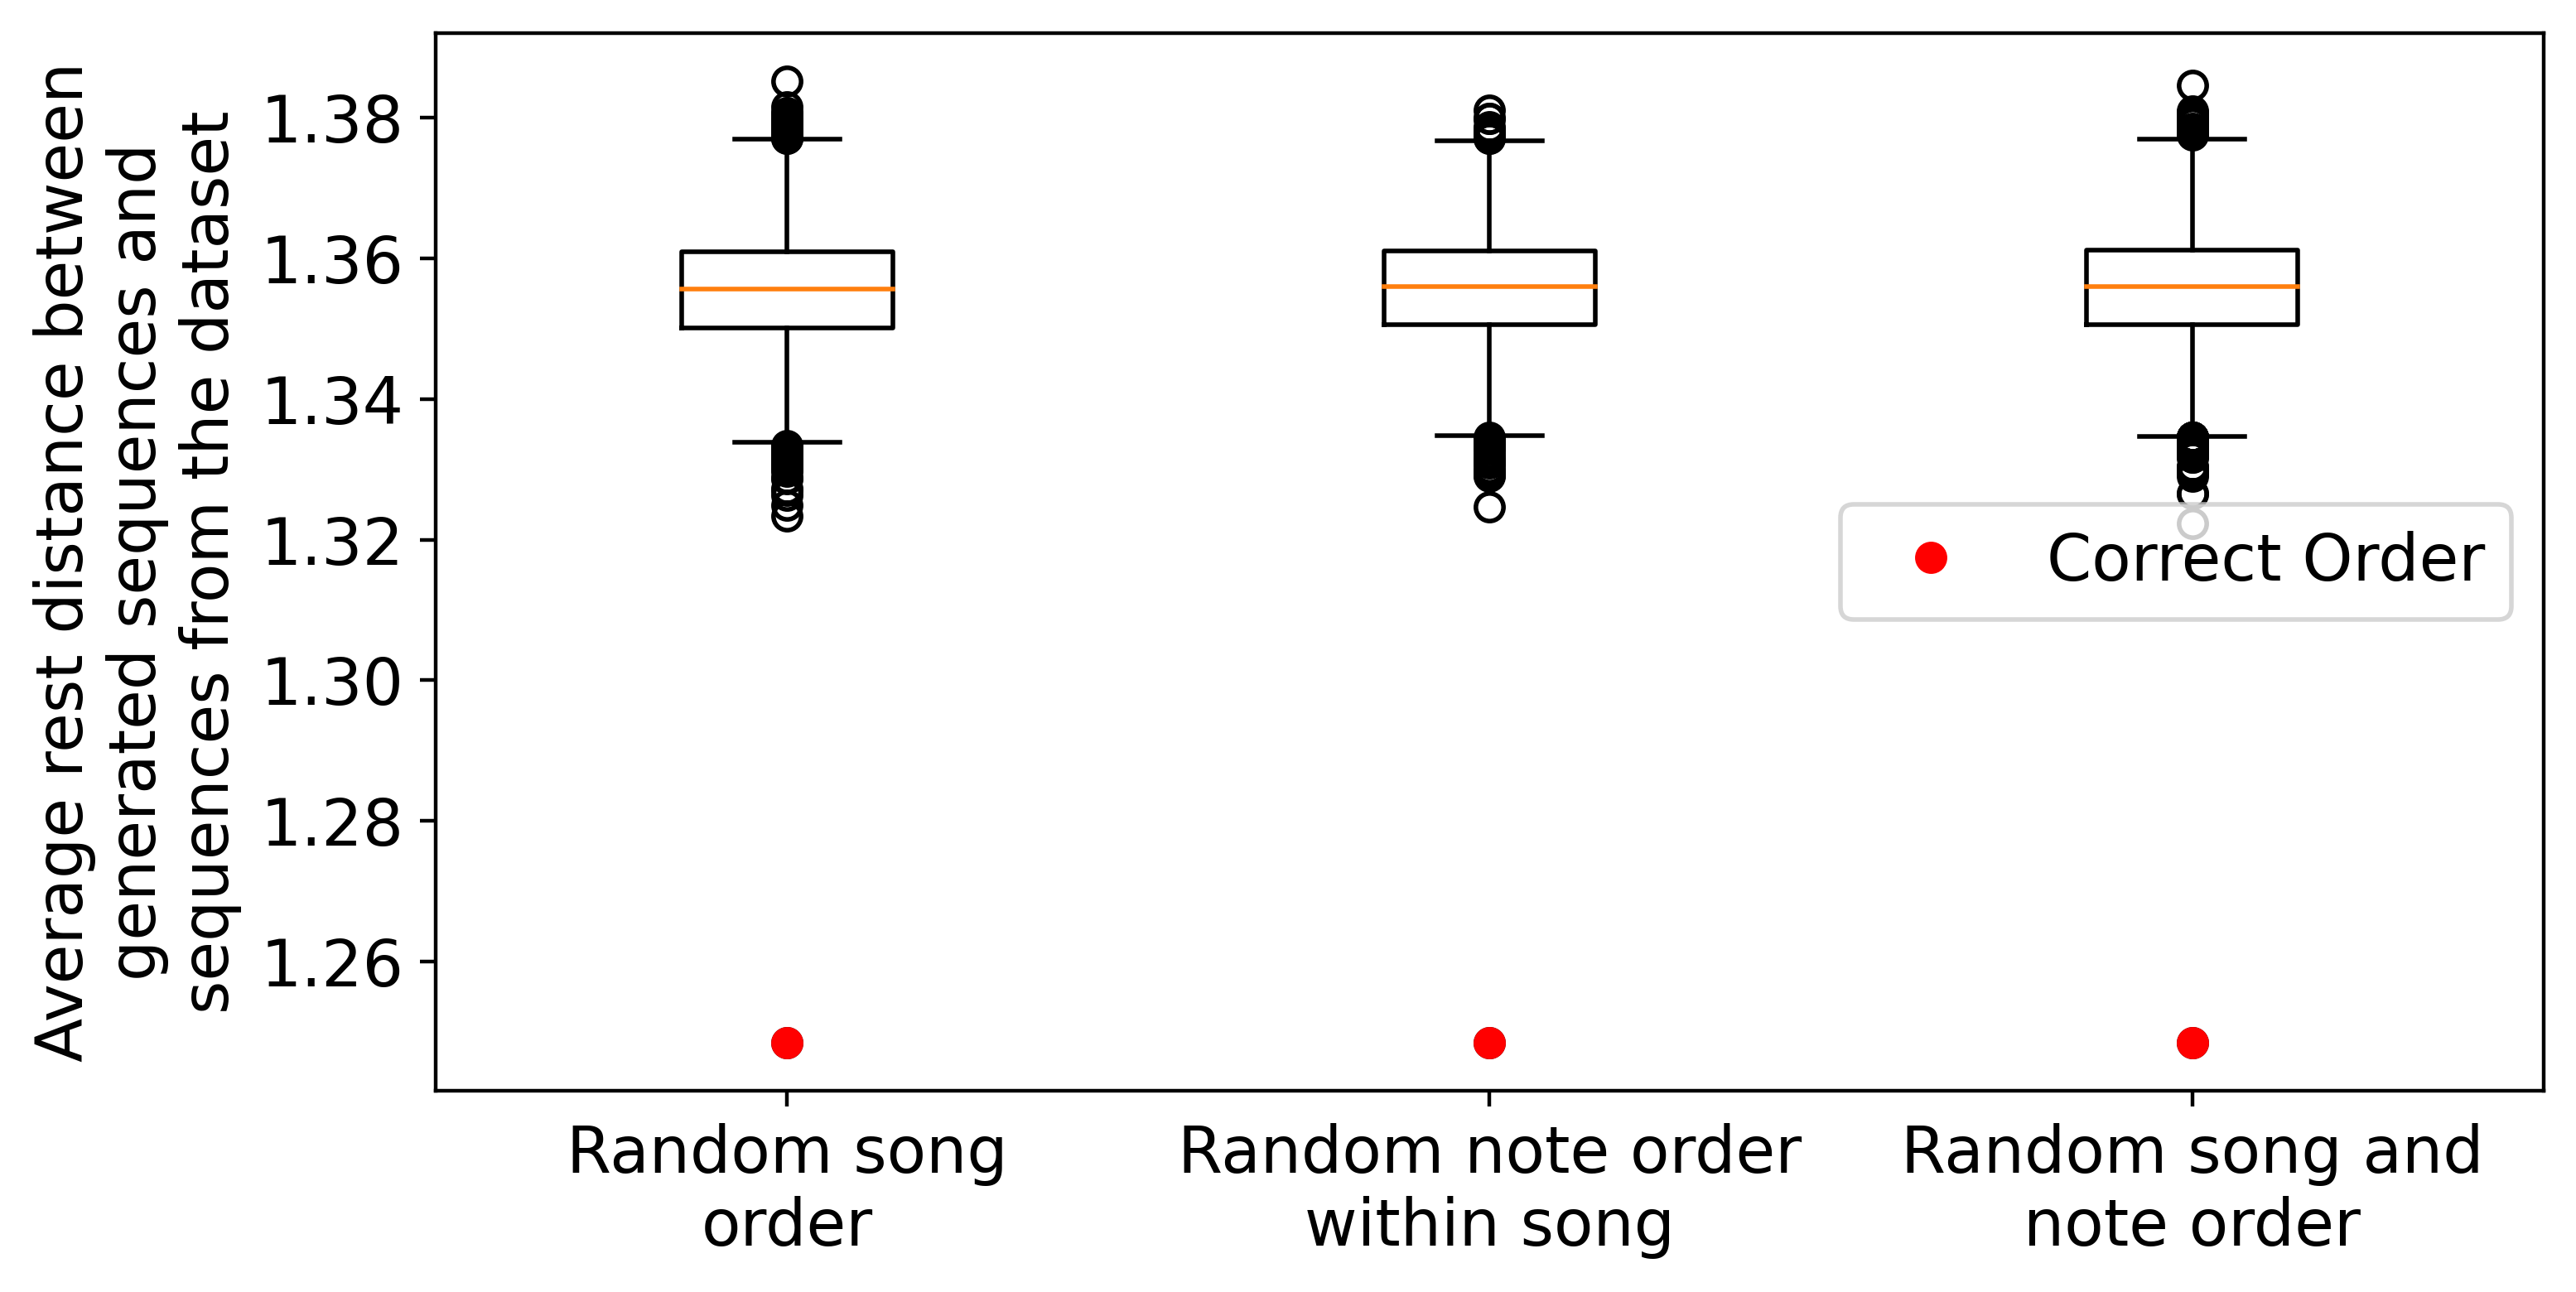

In [127]:

fig = plt.figure(num=None, figsize=(8, 4), dpi=400, facecolor='w', edgecolor='k')

plt.rc('axes',  titlesize=14, labelsize=14)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)   # fontsize of the tick labels
plt.rc('ytick', labelsize=14)   # fontsize of the tick labels
plt.rc('legend', fontsize =14)   # legend fontsize

plt.boxplot([x3, y3, z3])
correct = plt.plot([None, x3[0], y3[0], z3[0]], 'o', color='red', label='Correct Order')
plt.legend(handles=correct, loc=1)
my_xticks = ['Random song\norder',
             'Random note order\nwithin song',
             'Random song and\nnote order']
plt.xticks(np.array([1, 2, 3]), my_xticks)
plt.ylabel('Average rest distance between\ngenerated sequences and\nsequences from the dataset')


plt.legend()
plt.tight_layout()
plt.savefig('./figures/rest_distance_boxplot.png')


In [128]:

# end of notebook
